<a href="https://colab.research.google.com/github/Akhy999/pytorch3d-meshes/blob/main/smpl-texture-cameraoptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip smplpytorch-master.zip

Archive:  smplpytorch-master.zip
a18b0197d8a7204865b2ec95307e2286533f9487
   creating: smplpytorch-master/
  inflating: smplpytorch-master/.gitignore  
  inflating: smplpytorch-master/LICENSE  
  inflating: smplpytorch-master/README.md  
   creating: smplpytorch-master/assets/
  inflating: smplpytorch-master/assets/image.png  
  inflating: smplpytorch-master/demo.py  
  inflating: smplpytorch-master/display_utils.py  
  inflating: smplpytorch-master/environment.yml  
  inflating: smplpytorch-master/image.png  
  inflating: smplpytorch-master/setup.py  
   creating: smplpytorch-master/smplpytorch/
 extracting: smplpytorch-master/smplpytorch/__init__.py  
   creating: smplpytorch-master/smplpytorch/native/
 extracting: smplpytorch-master/smplpytorch/native/__init__.py  
   creating: smplpytorch-master/smplpytorch/native/models/
 extracting: smplpytorch-master/smplpytorch/native/models/README.md  
   creating: smplpytorch-master/smplpytorch/native/webuser/
 extracting: smplpytorch-master/

In [7]:
pip install chumpy

     |████████████████████████████████| 51kB 5.6MB/s 
  Created wheel for chumpy: filename=chumpy-0.70-cp37-none-any.whl size=58291 sha256=6674bea21bb3253218db54d2e1a1a9e52f4644686e736696945ecf44b13e7145
  Stored in directory: /root/.cache/pip/wheels/0a/73/91/b8dbef9746a907c8c008fc194a9691224ca3371b55f16f1dbd
Successfully built chumpy


In [28]:
!python smplpytorchmaster/demo.py

/content/smplpytorchmaster/smplpytorch/pytorch/smpl_layer.py:41: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  torch.Tensor(smpl_data['betas'].r).unsqueeze(0))
tensor([[0.0058, 0.0722, 0.1514, 0.0623, 0.0881, 0.0224, 0.1866, 0.1675, 0.0949,
         0.1655, 0.0790, 0.0761, 0.0072, 0.0711, 0.1650, 0.1534, 0.1775, 0.0207,
         0.0597, 0.0786, 0.0198, 0.0412, 0.0694, 0.0426, 0.0221, 0.0751, 0.1236,
         0.1894, 0.0484, 0.0763, 0.0859, 0.1803, 0.1518, 0.1809, 0.1517, 0.1416,
         0.1403, 0.1829, 0.1387, 0.0311, 0.0640, 0.0480, 0.0404, 0.1628, 0.1452,
         0.1832, 0.1409

In [18]:
!python smplpytorchmaster/demo.py

/content/smplpytorchmaster/smplpytorch/pytorch/smpl_layer.py:41: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  torch.Tensor(smpl_data['betas'].r).unsqueeze(0))
tensor([[0.0138, 0.0636, 0.1256, 0.1121, 0.1889, 0.1423, 0.1104, 0.0797, 0.1747,
         0.1432, 0.1510, 0.0490, 0.1489, 0.1713, 0.0206, 0.1374, 0.0221, 0.1377,
         0.0962, 0.1142, 0.0162, 0.1108, 0.1104, 0.0128, 0.1494, 0.0366, 0.1511,
         0.1621, 0.0084, 0.0506, 0.0427, 0.0712, 0.1562, 0.0300, 0.0233, 0.0055,
         0.0306, 0.0487, 0.1794, 0.0616, 0.1025, 0.1783, 0.1586, 0.0919, 0.1536,
         0.1950, 0.0141

In [29]:
verts1 = torch.load('verts1.pt')
verts2 = torch.load('verts2.pt')
Jtr1 = torch.load('Jtr1.pt')
Jtr2 = torch.load('Jtr2.pt')

In [20]:
import os
import sys
import torch
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith("1.7") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{torch.__version__[0:5:2]}"
        ])
        !pip install pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !curl -LO https://github.com/NVIDIA/cub/archive/1.10.0.tar.gz
        !tar xzf 1.10.0.tar.gz
        os.environ["CUB_HOME"] = os.getcwd() + "/cub-1.10.0"
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   118  100   118    0     0    929      0 --:--:-- --:--:-- --:--:--   929
100  404k    0  404k    0     0  1201k      0 --:--:-- --:--:-- --:--:-- 1201k
  Cloning https://github.com/facebookresearch/pytorch3d.git (to revision stable) to /tmp/pip-req-build-6plsayfm
  Running command git clone -q https://github.com/facebookresearch/pytorch3d.git /tmp/pip-req-build-6plsayfm
  Running command git checkout -q 3c15a6c2469249c8b90a4f3e41e34350b8051b92
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 645kB 33.3MB/s 
  Created wheel for pytorch3d: filename=pytorch3d-0.4.0-cp37-cp37m-linux_x86_64.whl size=18585609 sha256=ac2f27ff2b155e8aabd993c94eb40854028af9f49ca5d382e2d678963791fbea
  Stored in directory: /tmp/pip-ephem-wheel-cache-e0llzr4c/wheels/89/69/08/d864f516508b5d943259c6088baa150eb

In [30]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np

# libraries for reading data from files
from scipy.io import loadmat
from PIL import Image
import pickle

# Data structures and functions for rendering
from pytorch3d.structures import Meshes
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras, 
    PointLights, 
    DirectionalLights, 
    Materials, 
    RasterizationSettings, 
    MeshRenderer, 
    MeshRasterizer,  
    SoftPhongShader,
    TexturesUV
)

# add path for demo utils functions 
import sys
import os
sys.path.append(os.path.abspath(''))

In [22]:
# Texture image
!wget -P data/DensePose https://raw.githubusercontent.com/facebookresearch/DensePose/master/DensePoseData/demo_data/texture_from_SURREAL.png

# UV_processed.mat
!wget https://dl.fbaipublicfiles.com/densepose/densepose_uv_data.tar.gz
!tar xvf densepose_uv_data.tar.gz -C data/DensePose
!rm densepose_uv_data.tar.gz

--2021-05-04 12:32:28--  https://raw.githubusercontent.com/facebookresearch/DensePose/master/DensePoseData/demo_data/texture_from_SURREAL.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 831242 (812K) [image/png]
Saving to: ‘data/DensePose/texture_from_SURREAL.png’

texture_from_SURREA 100%[===================>] 811.76K  --.-KB/s    in 0.04s   

2021-05-04 12:32:28 (22.3 MB/s) - ‘data/DensePose/texture_from_SURREAL.png’ saved [831242/831242]

--2021-05-04 12:32:29--  https://dl.fbaipublicfiles.com/densepose/densepose_uv_data.tar.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiti

In [31]:
# Setup
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")
    
# Set paths
DATA_DIR = "./data"
data_filename = os.path.join(DATA_DIR, "DensePose/UV_Processed.mat")
tex_filename = os.path.join(DATA_DIR,"DensePose/texture_from_SURREAL.png")
# rename your .pkl file or change this string
# verts_filename = os.path.join(DATA_DIR, "DensePose/smpl_model.pkl")


# Load SMPL and texture data
# with open(verts_filename, 'rb') as f:
#     data = pickle.load(f, encoding='latin1') 
#     v_template = torch.Tensor(data['v_template']).to(device) # (6890, 3)

v_template = verts1.squeeze()
print(v_template.shape)
ALP_UV = loadmat(data_filename)
with Image.open(tex_filename) as image:
    np_image = np.asarray(image.convert("RGB")).astype(np.float32)
tex = torch.from_numpy(np_image / 255.)[None].to(device)

verts = torch.from_numpy((ALP_UV["All_vertices"]).astype(int)).squeeze().to(device) # (7829,)
U = torch.Tensor(ALP_UV['All_U_norm']).to(device) # (7829, 1)
V = torch.Tensor(ALP_UV['All_V_norm']).to(device) # (7829, 1)
faces = torch.from_numpy((ALP_UV['All_Faces'] - 1).astype(int)).to(device)  # (13774, 3)
face_indices = torch.Tensor(ALP_UV['All_FaceIndices']).squeeze()  # (13774,)

torch.Size([6890, 3])


In [39]:
v_template2 = verts2.squeeze()
print(v_template2.shape)

torch.Size([6890, 3])


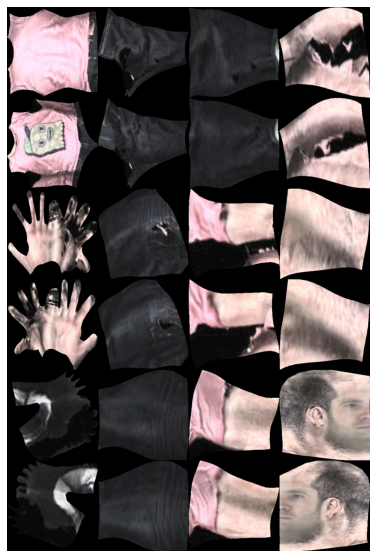

In [32]:
# Display the texture image
plt.figure(figsize=(10, 10))
plt.imshow(tex.squeeze(0).cpu())
plt.axis("off");

In [34]:
# Map each face to a (u, v) offset
offset_per_part = {}
already_offset = set()
cols, rows = 4, 6

for i, u in enumerate(np.linspace(0, 1, cols, endpoint=False)):
    for j, v in enumerate(np.linspace(0, 1, rows, endpoint=False)):
        part = rows * i + j + 1  # parts are 1-indexed in face_indices
        offset_per_part[part] = (u, v)
        
U_norm = U.clone()
V_norm = V.clone()

# iterate over faces and offset the corresponding vertex u and v values
for i in range(len(faces)):
    face_vert_idxs = faces[i]
    part = face_indices[i]
    offset_u, offset_v = offset_per_part[int(part.item())]
    
    for vert_idx in face_vert_idxs:   
        # vertices are reused, but we don't want to offset multiple times
        if vert_idx.item() not in already_offset:
            # offset u value
            #print(U[vert_idx])
            U_norm[vert_idx] = U[vert_idx] / cols + offset_u
            #print(U_norm[vert_idx])
            # offset v value
            # this also flips each part locally, as each part is upside down
            V_norm[vert_idx] = (1 - V[vert_idx]) / rows + offset_v
            # add vertex to our set tracking offsetted vertices
            already_offset.add(vert_idx.item())

# invert V values
V_norm = 1 - V_norm

In [35]:
# create our verts_uv values
verts_uv = torch.cat([U_norm[None],V_norm[None]], dim=2) # (1, 7829, 2)

# There are 6890 xyz vertex coordinates but 7829 vertex uv coordinates. 
# This is because the same vertex can be shared by multiple faces where each face may correspond to a different body part.  
# Therefore when initializing the Meshes class,
# we need to map each of the vertices referenced by the DensePose faces (in verts, which is the "All_vertices" field)
# to the correct xyz coordinate in the SMPL template mesh.
v_template_extended = v_template[verts-1][None] # (1, 7829, 3)

In [40]:
v_template_extended2 = v_template2[verts-1][None] # (1, 7829, 3)

In [36]:
texture = TexturesUV(maps=tex, faces_uvs=faces[None], verts_uvs=verts_uv)
mesh = Meshes(v_template_extended, faces[None], texture)

In [41]:
mesh2 = Meshes(v_template_extended2, faces[None], texture)

In [37]:
# Initialize a camera.
# World coordinates +Y up, +X left and +Z in.
R, T = look_at_view_transform(2.7, 0, 0) 
cameras = FoVPerspectiveCameras(device=device, R=R, T=T)

# Define the settings for rasterization and shading. Here we set the output image to be of size
# 512x512. As we are rendering images for visualization purposes only we will set faces_per_pixel=1
# and blur_radius=0.0. 
raster_settings = RasterizationSettings(
    image_size=512, 
    blur_radius=0.0, 
    faces_per_pixel=1, 
)

# Place a point light in front of the person. 
lights = PointLights(device=device, location=[[0.0, 0.0, 2.0]])

# Create a Phong renderer by composing a rasterizer and a shader. The textured Phong shader will 
# interpolate the texture uv coordinates for each vertex, sample from a texture image and 
# apply the Phong lighting model
renderer = MeshRenderer(
    rasterizer=MeshRasterizer(
        cameras=cameras, 
        raster_settings=raster_settings
    ),
    shader=SoftPhongShader(
        device=device, 
        cameras=cameras,
        lights=lights
    )
)

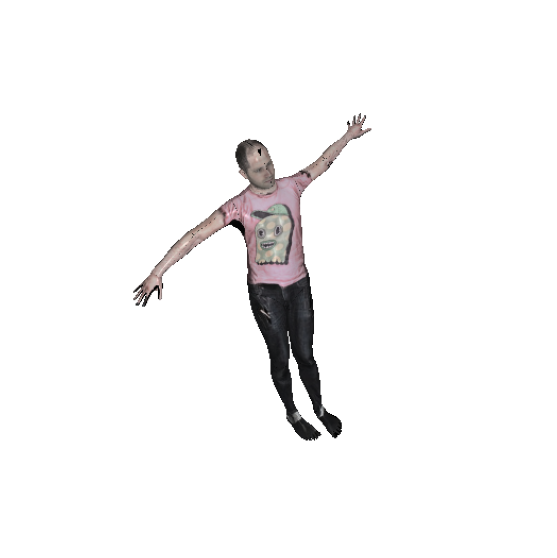

In [38]:
images = renderer(mesh)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.axis("off");

In [45]:
image_ref = images.cpu().numpy()

In [69]:
image_ref.shape

(1, 512, 512, 4)

In [93]:
images = renderer(mesh2)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.axis("off");

RuntimeError: ignored

<Figure size 720x720 with 0 Axes>

In [70]:
images.shape

torch.Size([1, 512, 512, 4])

In [83]:
# Rotate the person by increasing the elevation and azimuth angles to view the back of the person from above. 
R, T = look_at_view_transform(2.7, 10, 180)
cameras = FoVPerspectiveCameras(device=device, R=R, T=T)

# Move the light location so the light is shining on the person's back.  
lights.location = torch.tensor([[2.0, 2.0, 2.0]], device=device)

# Re render the mesh, passing in keyword arguments for the modified components.
images = renderer(mesh2, lights=lights, cameras=cameras)

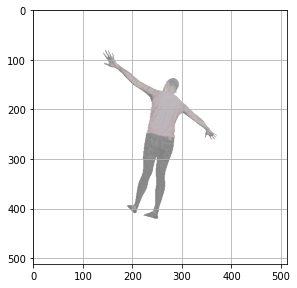

In [86]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(images.squeeze())
plt.grid(True)

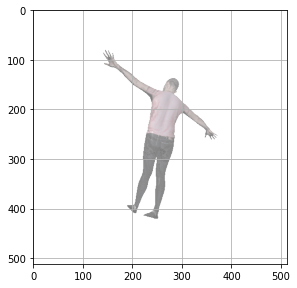

In [87]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_ref.squeeze())
plt.grid(True)

In [88]:
class Model(nn.Module):
    def __init__(self, meshes, renderer, image_ref):
        super().__init__()
        self.meshes = meshes
        self.device = meshes.device
        self.renderer = renderer
        
        image_ref = torch.from_numpy((image_ref).astype(np.float32))
        self.register_buffer('image_ref', image_ref)
        
        # Create an optimizable parameter for the x, y, z position of the camera. 
        self.camera_position = nn.Parameter(
            torch.from_numpy(np.array([3.0,  6.9, +2.5], dtype=np.float32)).to(meshes.device))

    def forward(self):
        
        # Render the image using the updated camera position. Based on the new position of the 
        # camera we calculate the rotation and translation matrices
        R = look_at_rotation(self.camera_position[None, :], device=self.device)  # (1, 3, 3)
        T = -torch.bmm(R.transpose(1, 2), self.camera_position[None, :, None])[:, :, 0]   # (1, 3)
        
        image = self.renderer(meshes_world=self.meshes.clone(), R=R, T=T)
        print(image[...,:3].shape)
        print(self.image_ref[...,:3].shape)
        # Calculate the silhouette loss
        loss = torch.sum((image[...,:3] - self.image_ref[...,:3]) ** 2)
        return loss, image

In [94]:
# We will save images periodically and compose them into a GIF.
filename_output = "./optimization_demo.gif"
writer = imageio.get_writer(filename_output, mode='I', duration=0.3)

# Initialize a model using the renderer, mesh and reference image
model = Model(meshes=mesh, renderer=renderer, image_ref=image_ref).to(device)

# Create an optimizer. Here we are using Adam and we pass in the parameters of the model
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [48]:
import os
import torch
import numpy as np
from tqdm.notebook import tqdm
import imageio
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from skimage import img_as_ubyte

# io utils
from pytorch3d.io import load_obj

# datastructures
from pytorch3d.structures import Meshes

# 3D transformations functions
from pytorch3d.transforms import Rotate, Translate

# rendering components
from pytorch3d.renderer import (
    FoVPerspectiveCameras, look_at_view_transform, look_at_rotation, 
    RasterizationSettings, MeshRenderer, MeshRasterizer, BlendParams,
    SoftSilhouetteShader, HardPhongShader, PointLights, TexturesVertex,
)

torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])


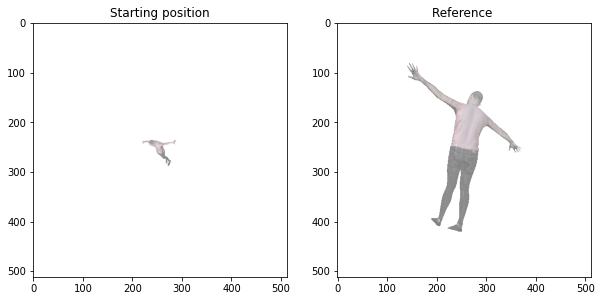

In [95]:
plt.figure(figsize=(10, 10))

_, image_init = model()
plt.subplot(1, 2, 1)
plt.imshow(image_init.detach().squeeze().cpu().numpy())
plt.grid(False)
plt.title("Starting position")

plt.subplot(1, 2, 2)
plt.imshow(model.image_ref.cpu().numpy().squeeze())
plt.grid(False)
plt.title("Reference ");

In [ ]:
loop = tqdm(range(200))
for i in loop:
    optimizer.zero_grad()
    loss, _ = model()
    loss.backward()
    optimizer.step()
    
    loop.set_description('Optimizing (loss %.4f)' % loss.data)
    
    if loss.item() < 200:
        break
    
    # Save outputs to create a GIF. 
    if i % 5 == 0:
        R = look_at_rotation(model.camera_position[None, :], device=model.device)
        T = -torch.bmm(R.transpose(1, 2), model.camera_position[None, :, None])[:, :, 0]   # (1, 3)
        image = renderer(meshes_world=model.meshes.clone(), R=R, T=T)
        image = image[0, ..., :3].detach().squeeze().cpu().numpy()
        image = img_as_ubyte(image)
        writer.append_data(image)
        
        plt.figure()
        plt.imshow(image[..., :3])
        plt.title("iter: %d, loss: %0.2f" % (i, loss.data))
        plt.grid("off")
        plt.axis("off")
    
writer.close()

torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1, 512, 512, 3])
torch.Size([1,